# Summary


# Outline 
- 0: Running To-Dos
- 1: Sequence of Three Auto Functions that Inform Further Search

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
# from lmfit.models import GaussianModel
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

In [2]:
cross = Table.read('sourcefiles.csv')

In [6]:
#instead of orb_dict, just orb for orbital period of src 7 
orb = float(cross[cross['src_n']==7]['Porb'])

In [7]:
orb

21.9

# 0: Running To-Dos
- final figure about orbital period --> convincing of ~25 days
- figure out what's going on with 700 day period
    - can it be connected to flare amplitude?

# 1: Sequence of Three Auto Functions that Inform Further Search

orbital period: 21.9


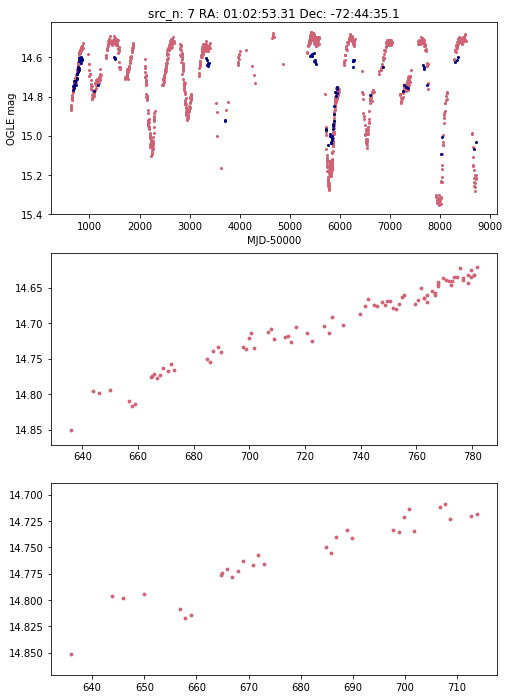

In [8]:
ilist,vlist = o.getIV(7,cross,plot=True,zooms=True,figsize=(8,12),mult=(3,8),offset=10,stack=False) #sometimes good to adjust offset
iband,vband = vstack(ilist),vstack(vlist)

In [9]:
idays = iband['MJD-50000']
imag = iband['I mag']

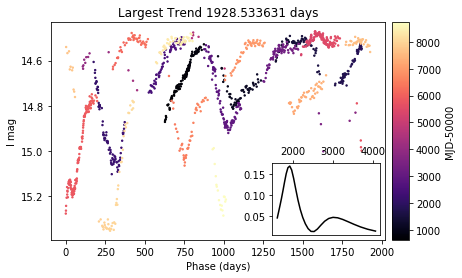

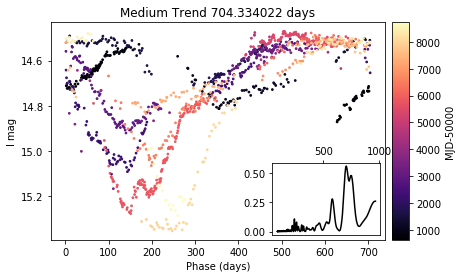

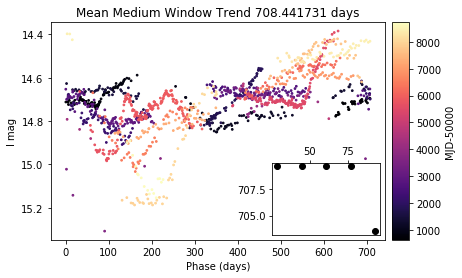

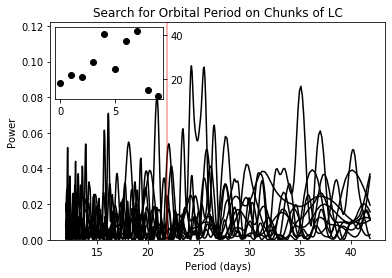

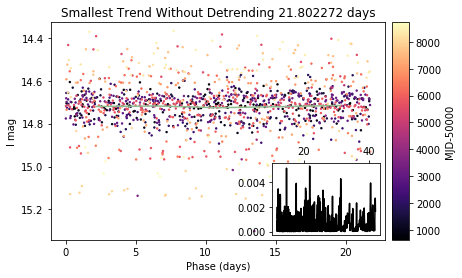

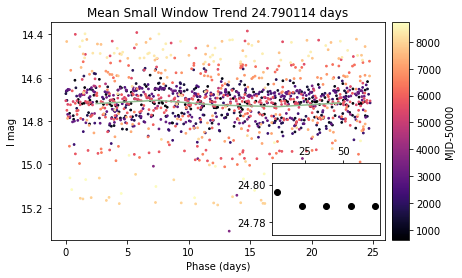

In [10]:
o.autopd(iband,orb,plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(10,20),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=7)

- suggestion of changing ~700 day trend (fold pretty good but increasingly off over time)
- orbital period showing up but should further investigate precise value and verify no changes


I and V-I correlation: -0.9670343623561133
V and V-I correlation: -0.9225217209125162


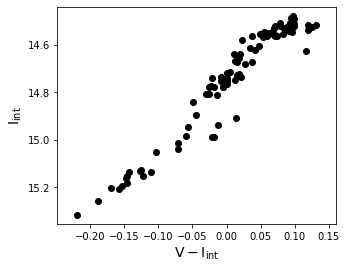

In [12]:
#redder when brighter but not a seemingly constant slope
o.colormag(iband,vband)

# 2: Orbital Period Periodogram Investigation

function below useful to searching around known orbital perod
- one for each O
- detrends and shows LC

<Quantity 24.77120287>

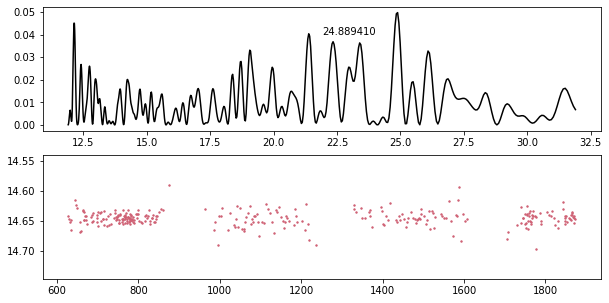

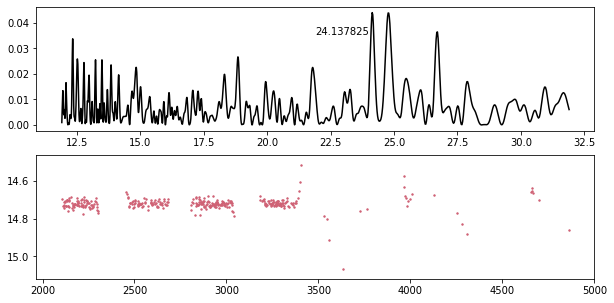

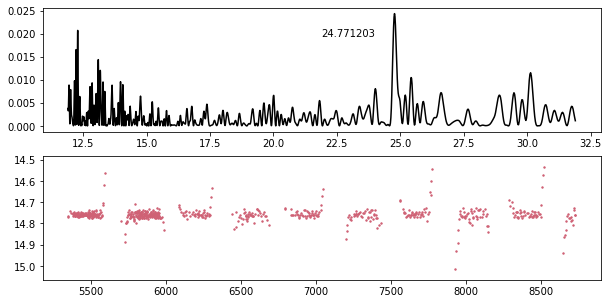

In [13]:
#example of pdgram on different og; beware of detrending window
o.knownorb(ilist[0],orb,lower=10,upper=10,window=9,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))
o.knownorb(ilist[1],orb,lower=10,upper=10,window=9,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))
o.knownorb(ilist[2],orb,lower=10,upper=10,window=9,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))

try using larger detrending window and cutdata takes only 500 points from OII
- much closer to known orbital period of 21.9

<Quantity 21.45951325>

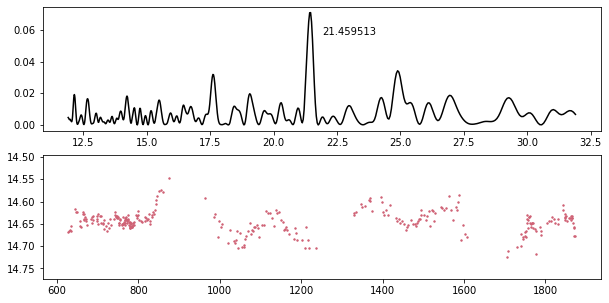

In [14]:
#same function can take smaller cut of data
#closer to known orbital period with this larger window of detrending
#some kind of ~200 day period?
o.knownorb(ilist[0],orb,lower=10,upper=10,window=31,cutdata=True,cut1=0,cut2=500,plotdet=True,figsize=(10,5))

start ind: 0, end ind: -1
start ind: 0, end ind: -1
start ind: 0, end ind: -1


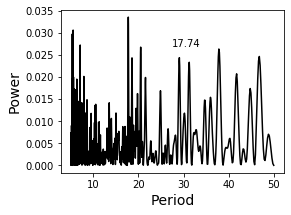

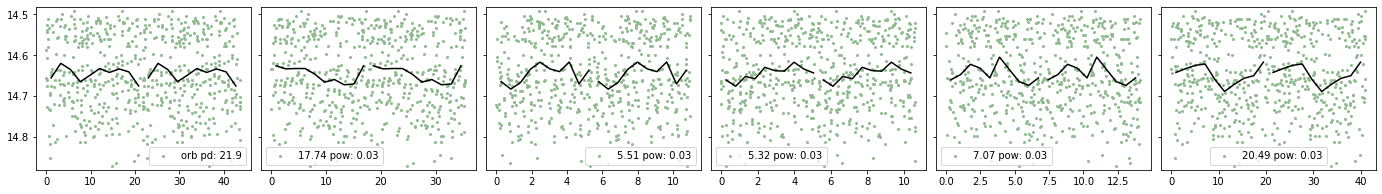

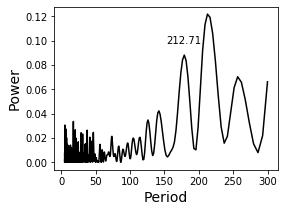

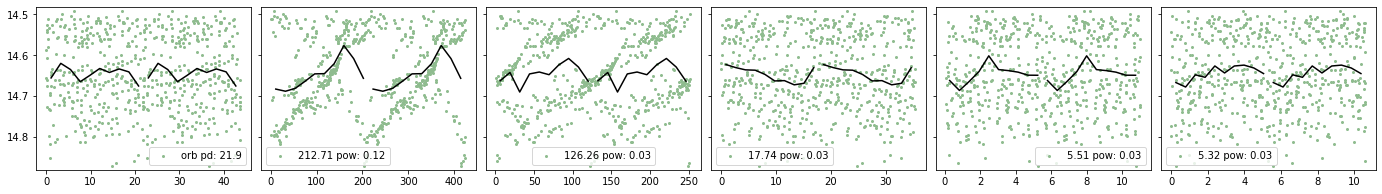

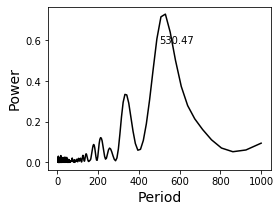

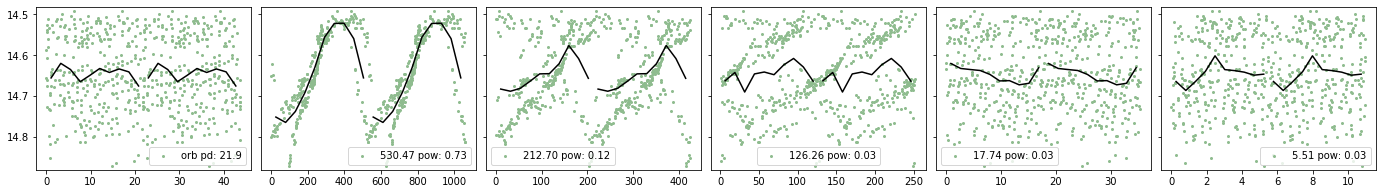

In [20]:
#periodogram without detrending with different upper and lower
df,pks = o.multiphase(ilist[0],orb=orb,maxp=50,dense=False,plotpd=True)
df,pks = o.multiphase(ilist[0],orb=orb,maxp=300,dense=False,plotpd=True)
df,pks = o.multiphase(ilist[0],orb=orb,maxp=1000,dense=False,plotpd=True)

## using dense regions

start ind: 788, end ind: 953


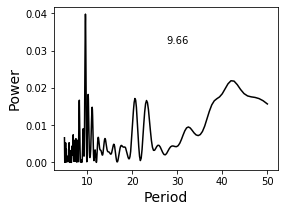

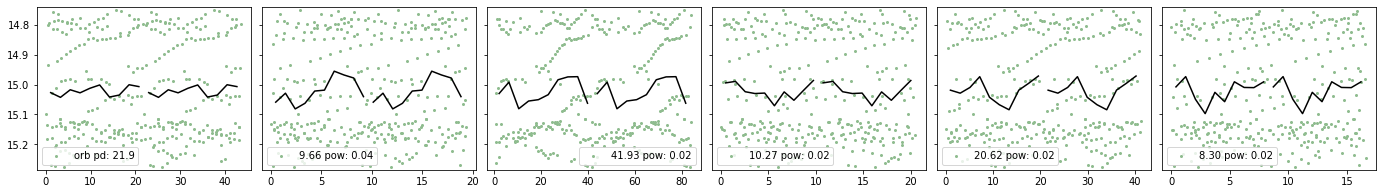

In [49]:
#phase-folds with densest region
df,pks = o.multiphase(iband,orb=orb,maxp=50,dense=True,plotpd=True,sigma=10,distance=10)


In [25]:
#chunks of light curve without gaps of 20 days
dense,mdense = o.finddense(iband,maxspace=20,retall=True)
dense

array([ 124,  125,  181,  191,  241,  243,  301,  382,  450,  550,  622,
        625,  626,  627,  628,  636,  637,  638,  639,  640,  644,  645,
        646,  787,  788,  953,  999, 1045, 1047, 1091, 1135, 1177, 1222,
       1269])

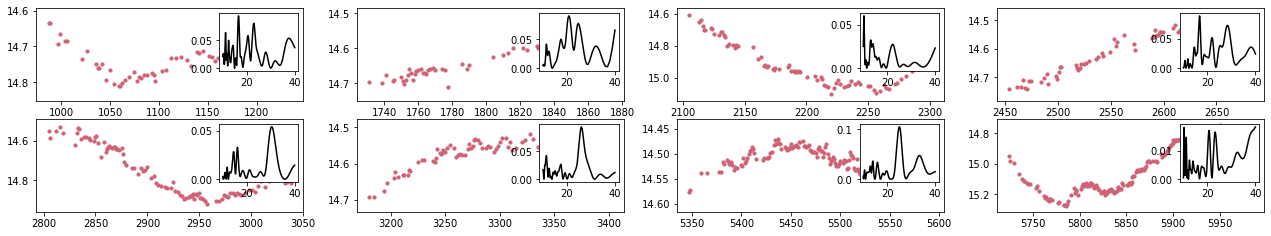

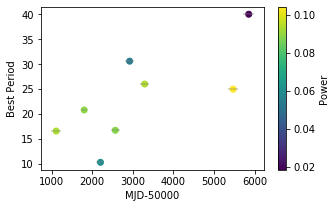

In [55]:
reload(o)
#minimum of 50 points
bps,bpow,stdate,endate = o.denselcpd(iband,dense,color=pink,minp=10,maxp=40,figsize=(22,16),minpoints=50,onlybp=True,plotbest=True)

repeating with lower bounds does not give any consistent period

#### try detrending dense regions


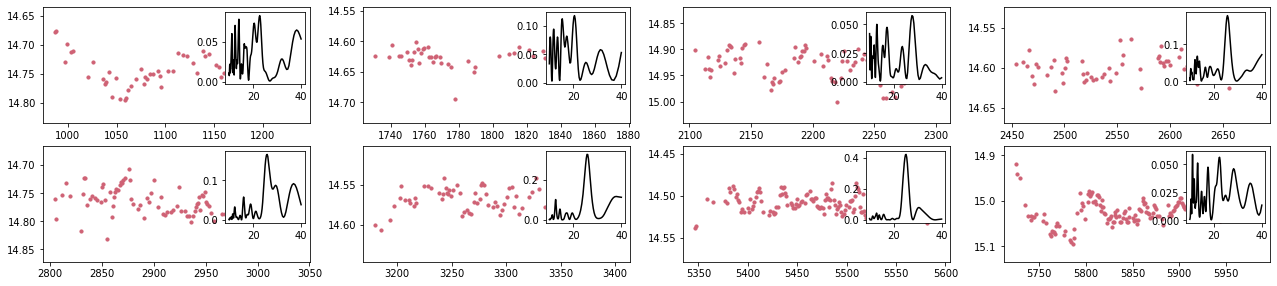

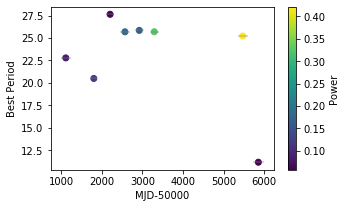

In [64]:
reload(o)
#minimum of 50 points; detrended
bps,bpow,stdate,endate = o.denselcpd(iband,dense,color=pink,minp=10,maxp=40,figsize=(22,20),minpoints=50,onlybp=True,det=True,window=31,plotbest=True)

changes by window as we saw above with knownorb function, but pretty steadily above 21.9 days

#### see more on orbital period in Sec 4 when I go into LCs themselves

# 3. ~700 Day Flare Periodogram Investigation

start ind: 0, end ind: -1


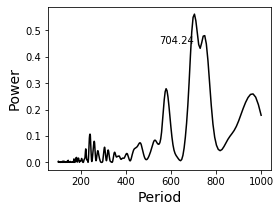

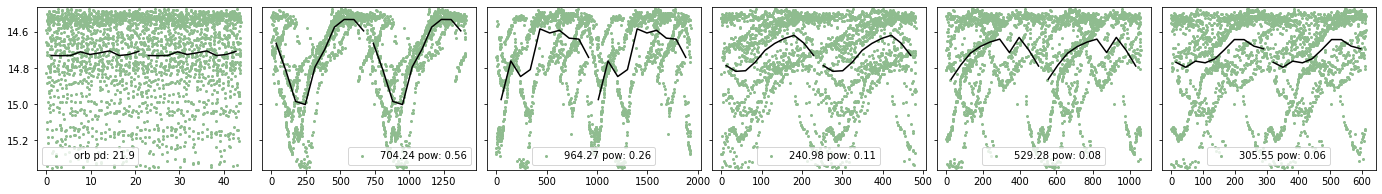

In [67]:
#periodograms with whole LC 
df,pks = o.multiphase(iband,orb=orb,minp=100,maxp=1000,plotpd=True,dense=False)

> 704.24 days from full LC

start ind: 0, end ind: -1


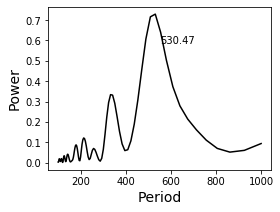

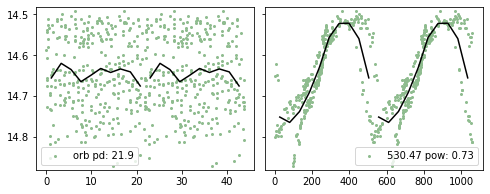

In [68]:
#periodograms with each Og
df,pks = o.multiphase(ilist[0],orb=orb,minp=100,maxp=1000,plotpd=True,dense=False)

> much lower: 530.47 days on OII **but only two flares included**

start ind: 0, end ind: -1


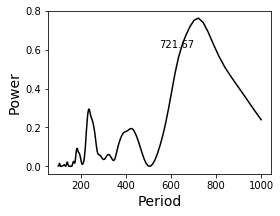

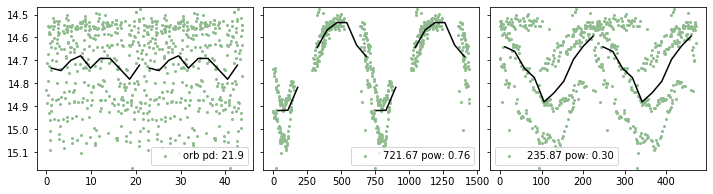

In [70]:
#OIII
df,pks = o.multiphase(ilist[1],orb=orb,minp=100,maxp=1000,plotpd=True,dense=False)

> much lower: 721.67 on OIII
> - will be worth it to check out ~230 day trend but could be sampling

start ind: 0, end ind: -1


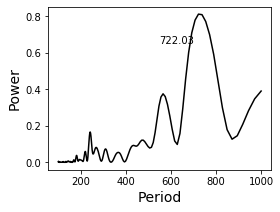

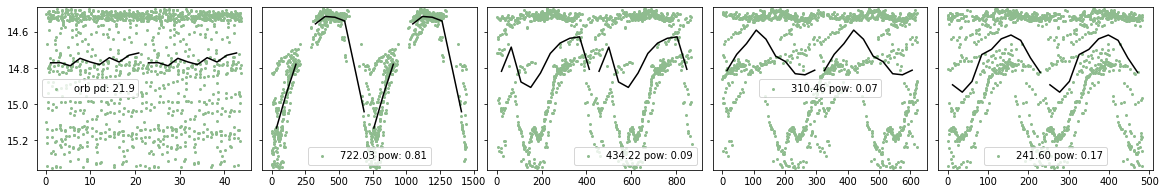

In [71]:
#OIV
df,pks = o.multiphase(ilist[2],orb=orb,minp=100,maxp=1000,plotpd=True,dense=False)

> close to previous: 722.03 days

In [73]:
len(iband)

1286

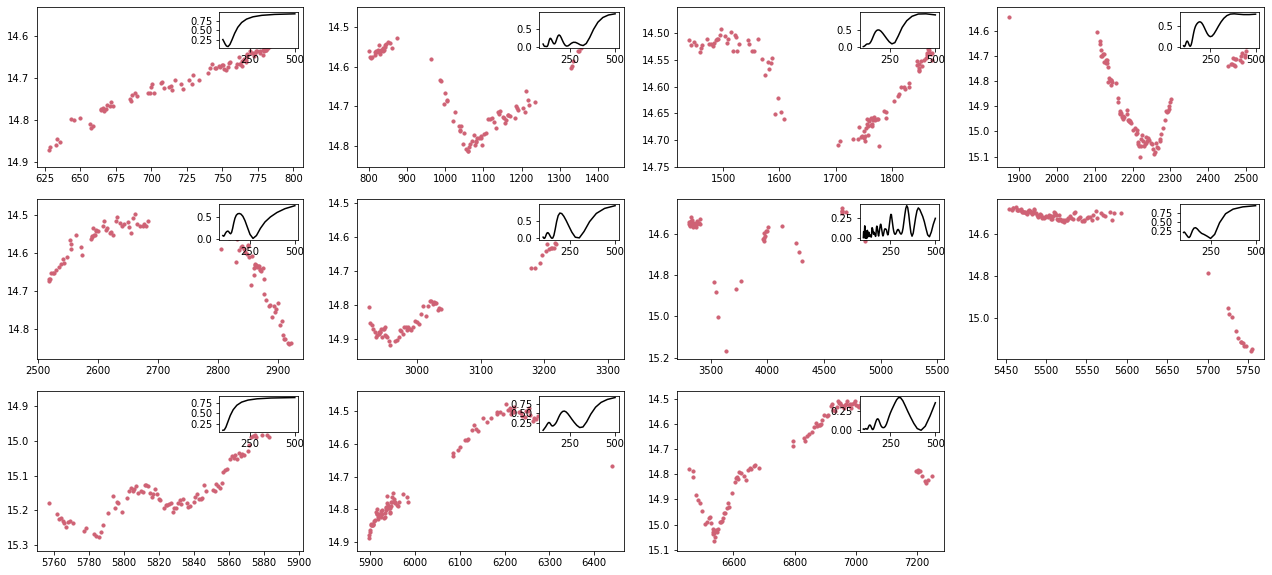

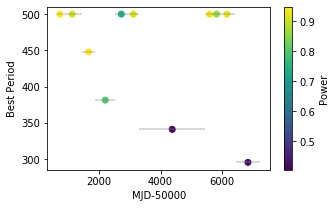

In [77]:
#check regions for ~240 day trend (but have to be bigger than dense regions)
reload(o)
reg = np.arange(0,1200,100)
#minimum of 50 points
bps,bpow,stdate,endate = o.denselcpd(iband,reg,color=pink,minp=100,maxp=500,figsize=(22,10),minpoints=50,onlybp=True,plotbest=True)

yes, nothing really jumping out
> let's move on to further investigating the orbital period and ~700 day trend with the LC itself

# 4. Looking For Orbital Pd w/ LC
- go through in chunks and look for best period with line spacing, phase-folding
- skipping parts where I can't identify helpful features for the above method

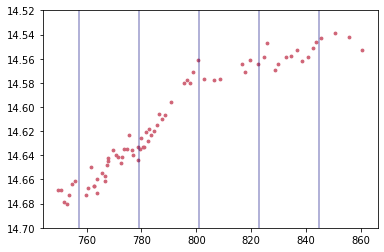

In [105]:
plt.figure(figsize=(6,4))
st = 50
end = 123

plt.scatter(idays[st:end],imag[st:end],color=pink,s=8)

plt.ylim(14.7,14.52)
for i in range(-2,3):
    plt.axvline(801+i*21.9,color='navy',alpha=0.4)


difficult b/c small variations but can kind of see variation on timescale shown above
- can't really justify an exact value though

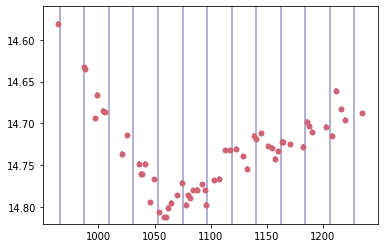

In [117]:
plt.figure(figsize=(6,4))
st = 124
end = 181

plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=5)

plt.ylim(14.82,14.56)
for i in range(-5,8):
    plt.axvline(1075+i*21.9,color='navy',alpha=0.4)

In [145]:
#quadratic model for region below
st = 181
end = 220
qmod = np.polyfit(idays[st:end],imag[st:end],2)
tmod = np.polyfit(idays[st:end],imag[st:end],3)

In [144]:
def quad(x,mod):
    return mod[0]*x**2 + mod[1]*x + mod[2]
def tri(x,mod):
    return mod[0]*x**3 + mod[1]*x**2 + mod[2]*x + mod[3]

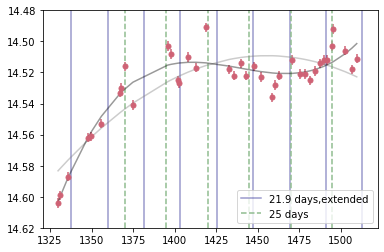

In [147]:
plt.figure(figsize=(6,4))

plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=5)

plt.ylim(14.62,14.48)
for i in range(12,20):
    plt.axvline(1075+i*21.9,color='navy',alpha=0.4)
plt.axvline(1075+20*21.9,color='navy',alpha=0.4,label='21.9 days,extended')

for i in range(-5,0):
    plt.axvline(1495+i*25,color='darkseagreen',linestyle='dashed')
plt.axvline(1495,color='darkseagreen',linestyle='dashed',label='25 days')

#quadratic fit
plt.plot(idays[st:end],quad(idays[st:end],qmod),color='grey',alpha=0.4)
plt.plot(idays[st:end],tri(idays[st:end],tmod),color='black',alpha=0.4)

plt.legend()

> orb not working perfectly but good suggestion of ~orb period (though maybe should shift right or be slightly higher?) starting at 1450

Text(0.5, 1.0, '25 day period phase-fold on detrended chunk of LC')

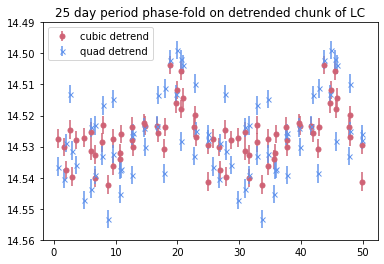

In [155]:
#phase-fold above with 25 days after fitting with parabola
plt.figure(figsize=(6,4))
qdet = imag[st:end] - quad(idays[st:end],qmod) + np.mean(imag[st:end])
tdet = imag[st:end] - tri(idays[st:end],tmod) + np.mean(imag[st:end])
plt.errorbar(idays[st:end]%25,tdet,yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=5,label='cubic detrend')
plt.errorbar(25+idays[st:end]%25,tdet,yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=5)
#quadratic detrended
plt.errorbar(idays[st:end]%25,qdet,yerr=iband['I mag err'][st:end],color=blue,linestyle='none',marker='x',markersize=5,label='quad detrend')
plt.errorbar(25+idays[st:end]%25,qdet,yerr=iband['I mag err'][st:end],color=blue,linestyle='none',marker='x',markersize=5)
plt.ylim(14.56,14.49)
plt.legend()
plt.title('25 day period phase-fold on detrended chunk of LC')

Text(0.5, 1.0, '21.9 day period phase-fold on detrended chunk of LC')

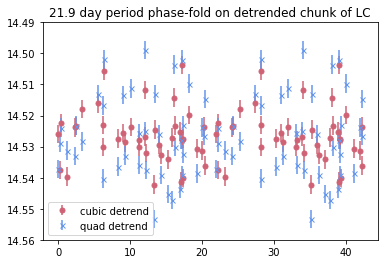

In [156]:
#compare to 21.9 day
#phase-fold above with 25 days after fitting with parabola
plt.figure(figsize=(6,4))
plt.errorbar(idays[st:end]%orb,tdet,yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=5,label='cubic detrend')
plt.errorbar(orb+idays[st:end]%orb,tdet,yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=5)
#quadratic detrended
plt.errorbar(idays[st:end]%orb,qdet,yerr=iband['I mag err'][st:end],color=blue,linestyle='none',marker='x',markersize=5,label='quad detrend')
plt.errorbar(orb+idays[st:end]%orb,qdet,yerr=iband['I mag err'][st:end],color=blue,linestyle='none',marker='x',markersize=5)
plt.ylim(14.56,14.49)
plt.legend()
plt.title('21.9 day period phase-fold on detrended chunk of LC')

> both LC itself and detrended phase-fold indicate that 25 day period may be better in this region of LC. however, 21.9 not ruled out. this suggestion was also made by some of the periodograms.
> - continuing on with next part of LC -- look out for this kind of behavior continuing

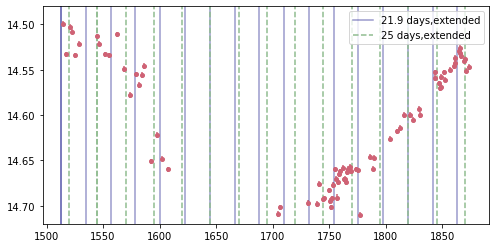

In [179]:
plt.figure(figsize=(8,4))
st = 220
end = 301

plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)


plt.ylim(14.72,14.48)
for i in range(20,37):
    plt.axvline(1075+i*21.9,color='navy',alpha=0.4)
plt.axvline(1075+20*21.9,color='navy',alpha=0.4,label='21.9 days,extended')

for i in range(1,16):
    plt.axvline(1495+i*25,color='darkseagreen',linestyle='dashed')
plt.axvline(1495+2*25,color='darkseagreen',linestyle='dashed',label='25 days,extended')

plt.legend()

neither previous trend giving meaningful predictions below, but can comment back in
- restarting search for periodicity within

(15.15, 14.55)

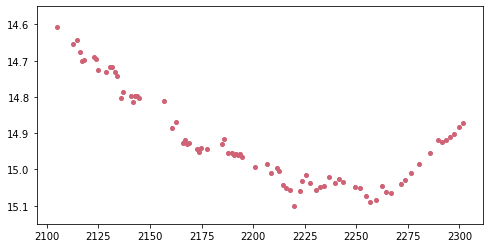

In [208]:
plt.figure(figsize=(8,4))
st = 301
end = 382

plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)


plt.ylim(15.15,14.55)
# for i in range(47,54):
#     plt.axvline(1075+i*21.9,color='navy',alpha=0.4)
# plt.axvline(1075+i*21.9,color='navy',alpha=0.4,label='21.9 days,extended')

# for i in range(24,30):
#     plt.axvline(1495+i*25,color='darkseagreen',linestyle='dashed')
# plt.axvline(1495+i*25,color='darkseagreen',linestyle='dashed',label='25 days,extended')
# plt.legend()
# plt.axvline(2226)
# plt.axvline(2226+15)
# plt.axvline(2186)


(14.85, 14.49)

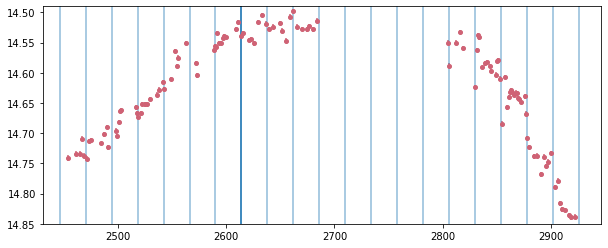

In [252]:
plt.figure(figsize=(10,4))
st = 382
end = 500

plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)

# for i in range(63,85):
#     plt.axvline(1075+i*21.9,color='navy',alpha=0.4)
# plt.axvline(1075+i*21.9,color='navy',alpha=0.4,label='21.9 days,extended')

# for i in range(38,60):
#     plt.axvline(1495+i*25,color='darkseagreen',linestyle='dashed')
# plt.axvline(1495+i*25,color='darkseagreen',linestyle='dashed',label='25 days,extended')
for i in range(-7,14):
    plt.axvline(2614+i*24,alpha=0.5)
plt.axvline(2614)

plt.ylim(14.85,14.49)

ambiguous here
- thought the final few flares of left segment would help, but zooming in shows their centers are unclear, and not necessarily equivalent to the max points (see below) which have varying spacing anyway

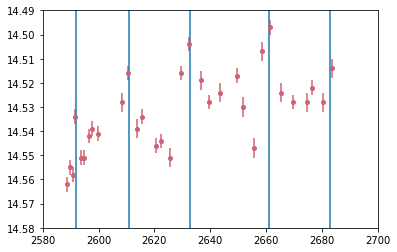

In [262]:
# zoom in on final few flares of left segment
plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.ylim(14.58,14.49)
plt.xlim(2580,2700)
#varying peak distances, but actual flare shapes ambiguous
plt.axvline(2592)
plt.axvline(2592+19)
plt.axvline(2592+19+21.9)
plt.axvline(2592+19+21.9+28)
plt.axvline(2592+19+21.9*2+28)

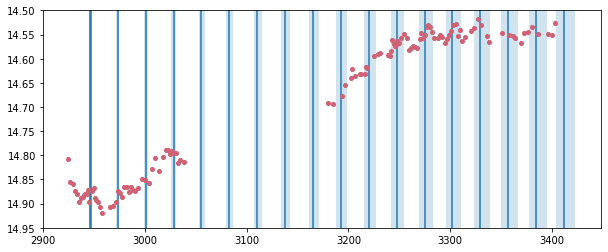

In [303]:
plt.figure(figsize=(10,4))
st = 500
end = 622

plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.ylim(14.95,14.5)
plt.axvline(2947)
for i in range(18):
    plt.axvline(2946+27.4*i)
    plt.axvspan(2945+27*i,2947+28*i,alpha=0.2)


In [333]:
#quad model for detrending region below
st = 650
end = 780
qmod = np.polyfit(iband['MJD-50000'][st:end],iband['I mag'][st:end],2)

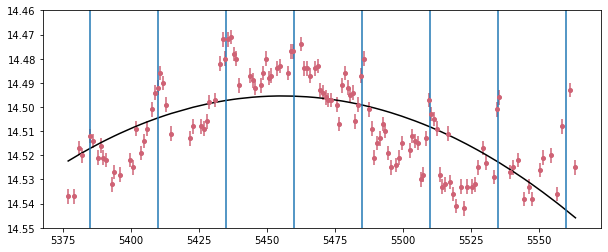

In [335]:
#much more helpful sampling
plt.figure(figsize=(10,4))
qdet = imag[st:end] - quad(idays[st:end],qmod) + np.mean(imag[st:end])
plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.plot(idays[st:end],quad(idays[st:end],qmod),color='black')

plt.ylim(14.55,14.46)

for i in range(8):
    plt.axvline(5385+25*i)
#     plt.axvspan(2945+27*i,2947+28*i,alpha=0.2)

<ErrorbarContainer object of 3 artists>

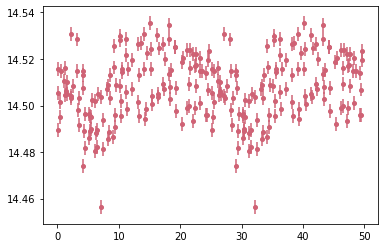

In [339]:
#phase-fold with detrended
torb = 25.02 #and really not comparable using 21.9
plt.errorbar(idays[st:end]%torb,qdet,yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.errorbar(torb+idays[st:end]%torb,qdet,yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)

<Quantity 24.28189076>

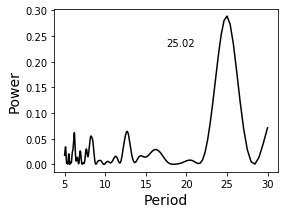

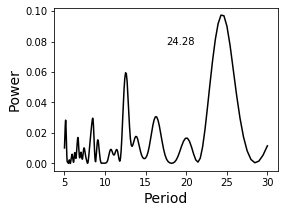

In [325]:
#periodogram with detrended
ttab = iband[st:end]
ttab['I detrend'] = qdet
o.periodogram(ttab,det=True)
#repeat without detrending
o.periodogram(ttab,det=False)


**more evidence that ~25 days potentially better. this good sampling is trustworthy. there are some signs of the same result in the previous few chunks, but the sampling was a bit low and the flare locations were not clear.** even without detrending the answer is quite close (see periodograms above)

(15.3, 14.85)

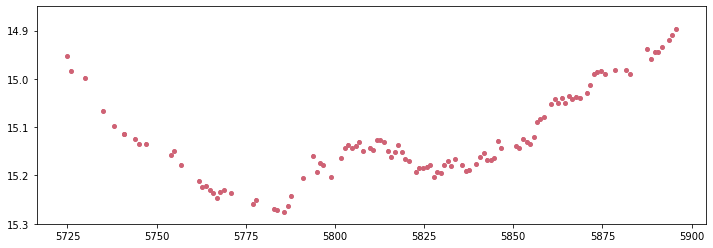

In [346]:
st = 788
end = 900
plt.figure(figsize=(12,4))
plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.ylim(15.3,14.85)

# for i in range(7):
#     plt.axvline(5385+25*i)
#     plt.axvspan(2945+27*i,2947+28*i,alpha=0.2)

<Quantity 23.41483813>

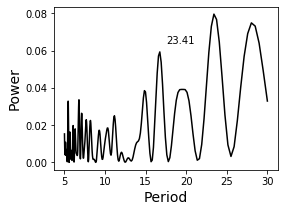

In [344]:
o.periodogram(iband[st:end])


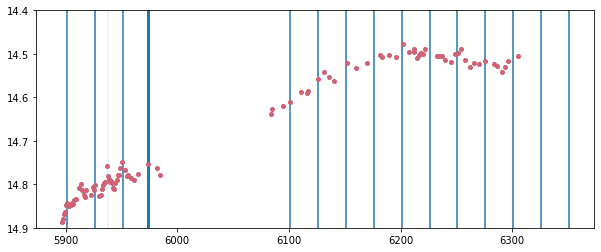

In [375]:
st = 900
end = 999

plt.figure(figsize=(10,4))
plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.ylim(14.9,14.4)
plt.axvline(5951)
plt.axvspan(5951+21.9,5951+25)
plt.axvline(5951-25)
plt.axvline(5951-50)

plt.axvline(5951-13,alpha=0.1)
for i in range(6,17):
    plt.axvline(5951+25*i)


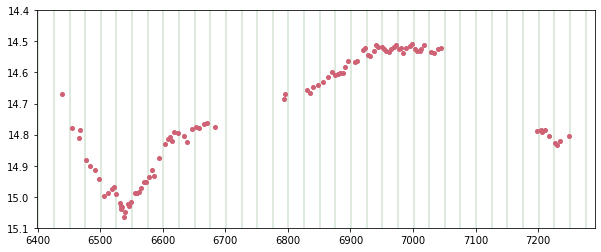

In [385]:
st = 999
end = 1100

plt.figure(figsize=(10,4))
plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.ylim(15.1,14.4)
for i in range(18,54):
    plt.axvline(5951+25*i,color='darkseagreen',alpha=0.4) #I think 25 looking better than 21.9

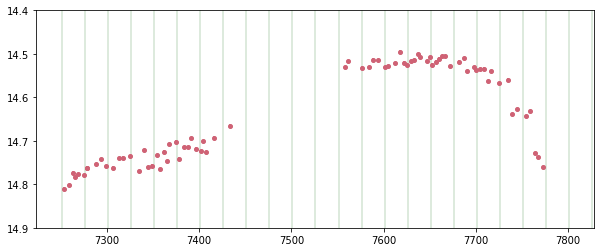

In [401]:
st = 1100
end = 1177

plt.figure(figsize=(10,4))
plt.errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
plt.ylim(14.9,14.4)
for i in range(52,76):
    plt.axvline(5951+25*i,color='darkseagreen',alpha=0.4) #I think 25 looking better than 21.9

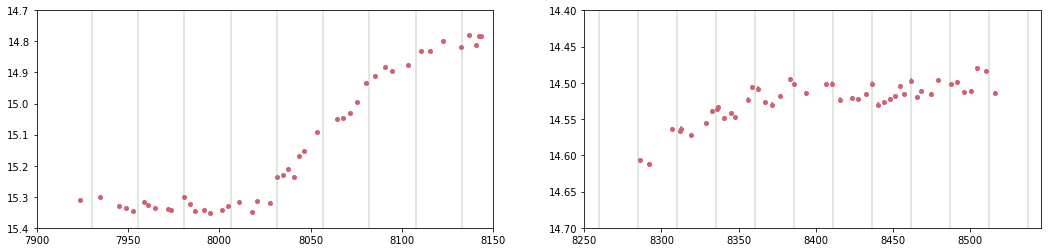

In [435]:
st = 1177
end = 1269

fig,ax = plt.subplots(1,2,figsize=(18,4))
ax[0].errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)
ax[1].errorbar(idays[st:end],imag[st:end],yerr=iband['I mag err'][st:end],color=pink,linestyle='none',marker='o',markersize=4)

ax[0].set_ylim(15.4,14.7)
ax[0].set_xlim(7900,8150)

ax[1].set_ylim(14.7,14.4)
ax[1].set_xlim(8250,)

# for i in range(52,76):
#     plt.axvline(5951+25*i,color='darkseagreen',alpha=0.4) #I think 25 looking better than 21.9
for i in range(-2,27):
    ax[0].axvline(7981+25.3*i,alpha=0.4,color='darkseagreen')
    ax[1].axvline(7981+25.3*i,alpha=0.4,color='darkseagreen')

~25.3 good period, especially in right subplot
- remaining points not helpful (just a few)

### went through whole LC
- **thinking period may be closer to 25 days. put it all together into one fig with subplots to see if it works starting from the beginning**

# 5. Looking For ~700 Day Pd w/ LC


Text(0.5, 0, 'MJD-50000')

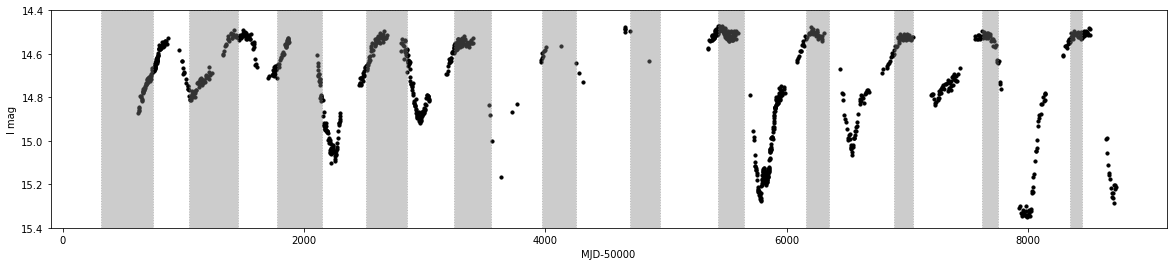

In [460]:
plt.figure(figsize=(20,4))
plt.scatter(iband['MJD-50000'],iband['I mag'],color='black',s=10)
for i in range(1,12):
    plt.axvspan(8350-i*730,8450-i*700,color='grey',alpha=0.4,linestyle='dotted')
plt.axvspan(8350,8450,color='grey',alpha=0.4,linestyle='dotted',label='728 days')


plt.ylim(15.4,14.4)
plt.ylabel('I mag')
plt.xlabel('MJD-50000')
# plt.legend()

(8000, 8800)

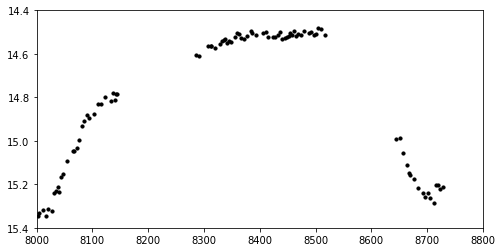

In [455]:
plt.figure(figsize=(8,4))
plt.scatter(iband['MJD-50000'],iband['I mag'],color='black',s=10)
plt.ylim(15.4,14.4)
plt.xlim(8000,8800)